In [1]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

In [2]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')
lon_min = -40
lon_max = 5
lat_min = -3
lat_max = 3

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

In [3]:
data_in = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/FOCI_intercomparison/data/'

temp_tmp = xr.open_dataset(data_in+'temp_oras4_1958_2017_60W20W_30S30N.nc')
temp_tmp2=temp_tmp.rename({'DEPTH':'depth','LAT61_120': 'lat','LONN59_20': 'lon','TIME':'time'})

temp = temp_tmp2.THETAO.sel(time=slice(datetime(1982, 1, 1), datetime(2017, 12, 31)))
temp_eq = Atools.data_sub(temp,-40,10,-3,3).mean(dim='lat')


temp_eq_jja = temp_eq.sel(time=is_jja(
    temp_eq['time.month']))


temp_eq_mean_jja = temp_eq_jja.mean(dim='time')


# SST data

In [4]:
sst_mean_cmip5_1 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip5_hist.nc')
sst_mean_cmip5_2 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip5_rcp85.nc')


In [5]:
sst_mean_cmip6_1 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip6_hist.nc')
sst_mean_cmip6_2 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip6_rcp85.nc')


In [6]:
diff_model_cmip5 = sst_mean_cmip5_2.jja_sst - sst_mean_cmip5_1.jja_sst
diff_model_cmip6 = sst_mean_cmip6_2.jja_sst - sst_mean_cmip6_1.jja_sst

# Subsurface temperature data

In [7]:
temp_eq_rcp85 = xr.open_dataset(path_data+'temp_eq_cmip5_40W_10E_rcp85.nc')
temp_eq_hist = xr.open_dataset(path_data+'temp_eq_cmip5_40W_10E_hist.nc')

In [8]:
diff_eq_temp_cmip5_jja = temp_eq_rcp85.temp_eq_jja[:] - temp_eq_hist.temp_eq_jja[:]
diff_eq_temp_cmip5 = temp_eq_rcp85.temp_eq[:] - temp_eq_hist.temp_eq[:]

In [9]:
temp_eq_ssp585_cmip6 = xr.open_dataset(path_data+'temp_eq_cmip6_40W_10E_ssp585.nc')
temp_eq_hist_cmip6 = xr.open_dataset(path_data+'temp_eq_cmip6_40W_10E_hist.nc')

In [10]:
temp_eq_ssp585_cmip6.model[10]

<xarray.DataArray 'model' ()>
array('IPSL-CM6A-LR', dtype='<U12')
Coordinates:
    model    <U12 'IPSL-CM6A-LR'

In [11]:
diff_eq_temp_cmip6_jja = temp_eq_ssp585_cmip6.temp_eq_jja[:] - temp_eq_hist_cmip6.temp_eq_jja[:]
diff_eq_temp_cmip6 = temp_eq_ssp585_cmip6.temp_eq[:] - temp_eq_hist_cmip6.temp_eq[:]

In [12]:
temp_eq_hist_cmip6.temp_eq_jja[10,:,:]

<xarray.DataArray 'temp_eq_jja' (depth: 56, lon: 51)>
array([[26.324259, 26.242273, 26.179628, ..., 27.184362, 27.385248,       nan],
       [26.322012, 26.238783, 26.171896, ..., 27.090395, 27.339827,       nan],
       [26.309294, 26.225962, 26.156273, ..., 26.703278, 27.139059,       nan],
       ...,
       [ 4.288272,  4.279615,  4.27712 , ...,  3.753034,       nan,       nan],
       [ 4.132769,  4.126612,  4.125265, ...,  3.70683 ,       nan,       nan],
       [ 3.977266,  3.973608,  3.97341 , ...,  3.660626,       nan,       nan]])
Coordinates:
    model    <U12 'IPSL-CM6A-LR'
  * depth    (depth) float64 5.0 10.0 15.0 20.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lon      (lon) float64 -40.0 -39.0 -38.0 -37.0 -36.0 ... 7.0 8.0 9.0 10.0

# Figure IPSL

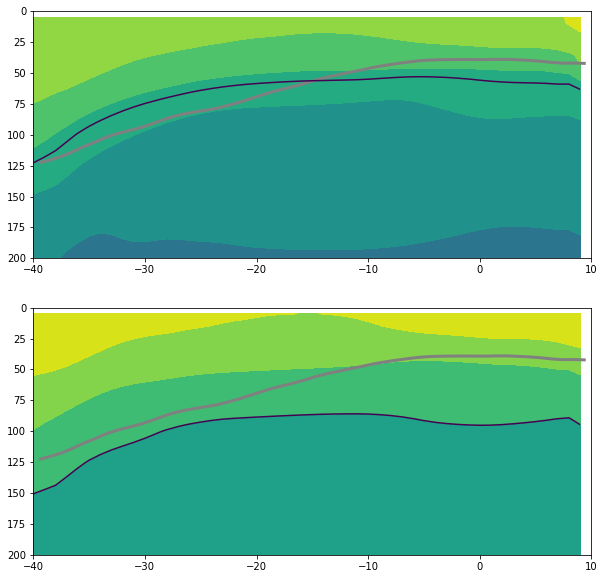

In [14]:
f,ax = plt.subplots(2,1,figsize=[10,10])
ax=ax.ravel()
ax[0].contour(temp_eq_mean_jja.lon,temp_eq_mean_jja.depth,temp_eq_mean_jja,levels=[20],linewidths=3,colors='grey')
ax[0].contourf(temp_eq_hist_cmip6.lon,temp_eq_hist_cmip6.temp_eq_jja[10,:,:].depth,
            temp_eq_hist_cmip6.temp_eq_jja[10,:,:])

ax[0].contour(temp_eq_hist_cmip6.lon,temp_eq_hist_cmip6.temp_eq_jja[10,:,:].depth,
            temp_eq_hist_cmip6.temp_eq_jja[10,:,:],levels=[20])
ax[0].set_ylim([0,200])
ax[0].invert_yaxis()

ax[1].contour(temp_eq_mean_jja.lon,temp_eq_mean_jja.depth,temp_eq_mean_jja,levels=[20],linewidths=3,colors='grey')
ax[1].contourf(temp_eq_ssp585_cmip6.lon,temp_eq_ssp585_cmip6.temp_eq_jja[10,:,:].depth,
            temp_eq_ssp585_cmip6.temp_eq_jja[10,:,:])

ax[1].contour(temp_eq_ssp585_cmip6.lon,temp_eq_ssp585_cmip6.temp_eq_jja[10,:,:].depth,
            temp_eq_ssp585_cmip6.temp_eq_jja[10,:,:],levels=[20])
ax[1].set_ylim([0,200])
ax[1].invert_yaxis()